In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings 
import os
warnings.filterwarnings('ignore')

In [63]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [7]:
# !unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [8]:
train_path = '/content/drive/MyDrive/Facial Expression/train'
test_path = '/content/drive/MyDrive/Facial Expression/test'

In [11]:
os.listdir(train_path + '/fear/')
fear = train_path + '/fear/' + 'Training_31690716.jpg'

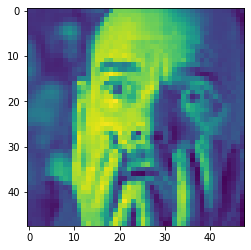

In [12]:
plt.imshow(imread(fear))

In [14]:
os.listdir(train_path + '/happy/')
happy = train_path + '/happy/' + 'Training_21946902.jpg'

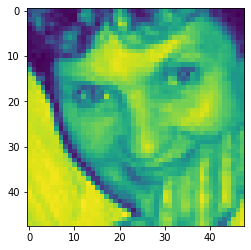

In [15]:
plt.imshow(imread(happy))

In [16]:
len(os.listdir(train_path + '/happy/'))

7215

In [17]:
len(os.listdir(train_path + '/neutral/'))

4965

In [18]:
imread(happy).shape

(48, 48)

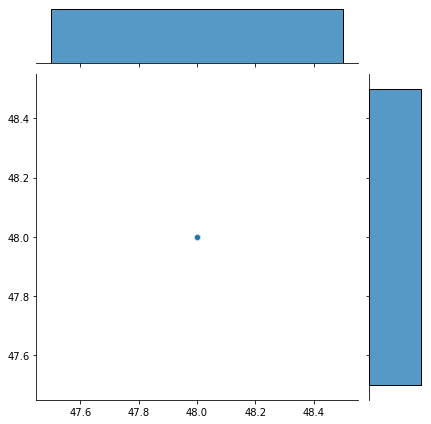

In [22]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(test_path + '/happy/'):
  img = imread(test_path + '/happy/' + image)
  d1, d2 = img.shape
  dim1.append(d1)
  dim2.append(d2)

sns.jointplot(dim1, dim2)

In [23]:
image_shape = (48, 48, 1)

In [24]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)
test_data_gen = ImageDataGenerator(rescale=1/255)

In [38]:
training_set = train_data_gen.flow_from_directory(train_path, target_size=image_shape[:2], class_mode='categorical', batch_size=32, color_mode='grayscale')
testing_set = test_data_gen.flow_from_directory(test_path, target_size=image_shape[:2], class_mode='categorical', batch_size=32, shuffle=False, color_mode='grayscale')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [39]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [40]:
next(training_set)[0].shape

(32, 48, 48, 1)

In [69]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(512, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [70]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=2)

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(training_set, batch_size=32, epochs=35, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/35
898/898 [==============================] - 93s 103ms/step - loss: 1.8143 - accuracy: 0.2470 - val_loss: 1.7918 - val_accuracy: 0.2471
Epoch 2/35
898/898 [==============================] - 91s 102ms/step - loss: 1.7893 - accuracy: 0.2535 - val_loss: 1.7445 - val_accuracy: 0.2772
Epoch 3/35
898/898 [==============================] - 91s 101ms/step - loss: 1.7671 - accuracy: 0.2687 - val_loss: 1.7105 - val_accuracy: 0.3016
Epoch 4/35
898/898 [==============================] - 92s 102ms/step - loss: 1.7442 - accuracy: 0.2818 - val_loss: 1.6793 - val_accuracy: 0.3229
Epoch 5/35
898/898 [==============================] - 90s 100ms/step - loss: 1.7139 - accuracy: 0.3016 - val_loss: 1.6092 - val_accuracy: 0.3435
Epoch 6/35
898/898 [==============================] - 90s 101ms/step - loss: 1.6696 - accuracy: 0.3282 - val_loss: 1.4859 - val_accuracy: 0.4278
Epoch 7/35
898/898 [==============================] - 91s 101ms/step - loss: 1.6200 - accuracy: 0.3586 - val_loss: 1.4745 - val_ac

In [73]:
losses = pd.DataFrame(model.history.history)

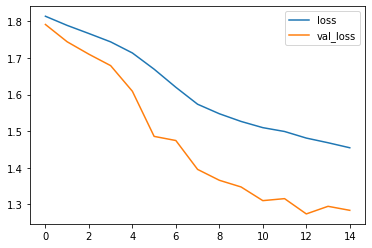

In [74]:
losses[['loss', 'val_loss']].plot()

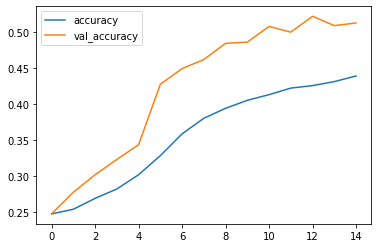

In [75]:
losses[['accuracy', 'val_accuracy']].plot()

In [76]:
model.evaluate(testing_set)

225/225 [==============================] - 15s 66ms/step - loss: 1.2837 - accuracy: 0.5132


[1.2836835384368896, 0.5132349133491516]

In [77]:
model.save('classifier.h5')

In [84]:
pred = model.predict(testing_set)

In [85]:
pred

array([[3.00217450e-01, 5.06865941e-02, 1.99086338e-01, ...,
        1.13635428e-01, 2.01336130e-01, 3.82050984e-02],
       [8.35670829e-02, 3.79666034e-03, 2.58208722e-01, ...,
        2.47640163e-02, 2.56531909e-02, 5.58860123e-01],
       [1.60137862e-01, 2.32906826e-02, 1.53200060e-01, ...,
        1.65025845e-01, 2.78675526e-01, 3.80137824e-02],
       ...,
       [2.20342129e-02, 9.55615542e-04, 2.96611547e-01, ...,
        5.98556409e-03, 6.33248175e-03, 5.60604811e-01],
       [2.04387009e-02, 4.53975954e-04, 1.04755484e-01, ...,
        7.17606454e-04, 1.11839280e-03, 8.71230781e-01],
       [4.56167432e-03, 5.32763988e-05, 1.13346905e-01, ...,
        2.86276365e-04, 2.29864818e-04, 8.58965158e-01]], dtype=float32)

In [86]:
testing_set.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [87]:
y_pred = np.argmax(pred, axis=1)

In [88]:
y_pred

array([0, 6, 5, ..., 6, 6, 6])

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(classification_report(testing_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.35      0.38       958
           1       0.00      0.00      0.00       111
           2       0.27      0.10      0.15      1024
           3       0.69      0.83      0.76      1774
           4       0.42      0.61      0.50      1233
           5       0.47      0.28      0.35      1247
           6       0.51      0.81      0.63       831

    accuracy                           0.51      7178
   macro avg       0.40      0.43      0.39      7178
weighted avg       0.48      0.51      0.48      7178



Confusion Matrix
[[ 337    0   82  121  232   95   91]
 [  55    0    9   21   16    2    8]
 [ 123    0  106  135  228  157  275]
 [  52    0   37 1480   96   32   77]
 [  81    0   51  154  748   97  102]
 [ 148    0   73  173  427  343   83]
 [  16    0   40   57   37   11  670]]


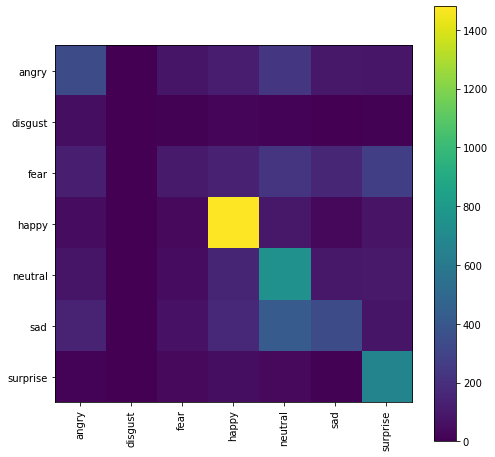

In [91]:
cm_train = confusion_matrix(testing_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
class_labels = testing_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
target_names = list(class_labels.values())
plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [93]:
angry = '/content/drive/MyDrive/Facial Expression/test/angry/PrivateTest_11296953.jpg'

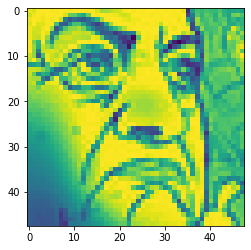

In [94]:
plt.imshow(imread(angry))

In [97]:
my_image = imread(angry)

In [98]:
type(my_image)

numpy.ndarray

In [99]:
my_image.shape

(48, 48)

In [101]:
new_image = np.expand_dims(my_image, axis=0, )

In [103]:
new_image.shape

(1, 48, 48)

In [105]:
np.argmax(model.predict(new_image))

4